# Т-Банк: поездки на самокатах

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar

In [ ]:
df = pd.read_csv('kicksharing.csv')
df

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,SL,3.690479,2024-08-07 09:47:25.000000,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,SL,1.114912,2024-10-17 14:57:20.000000,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,1.515612,2024-09-19 05:31:41.000000,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,SL,0.499411,2024-10-04 16:05:09.000000,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,SL,2.602028,2024-07-10 06:57:40.000000,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396744,349109813,755778419,M,18,NaN,NaN,СВЕРДЛОВСКАЯ ОБЛ,6.49,30.0,300.0,E,1.555069,2024-09-25 11:39:42.000000,2024-09-25 11:39:46.885000,2024-09-25 11:45:41.545313,5,2024-09-25 13:39:46.885000,68.94,6.89,NaN
396745,348829245,1146263947,M,23,NaN,NaN,КАЛИНИНГРАДСКАЯ ОБЛ,8.99,30.0,300.0,Max,2.270902,2024-09-24 20:05:43.000000,2024-09-24 20:05:46.954000,2024-09-24 20:13:58.592279,2,2024-09-24 19:05:46.954000,110.91,13.09,NaN
396746,273529251,1012601147,M,20,NaN,NaN,ТЮМЕНСКАЯ ОБЛ,8.79,50.0,300.0,E,1.411171,2024-09-03 16:07:43.000000,2024-09-03 16:07:45.311487,2024-09-03 16:28:07.510118,3,2024-09-03 16:07:45.311487,234.59,234.59,NaN
396747,306062051,863877659,M,19,NaN,NaN,Г САНКТ-ПЕТЕРБУРГ,7.49,50.0,300.0,SL,1.002400,2024-09-12 18:28:48.000000,2024-09-12 18:28:50.401000,2024-09-12 18:32:22.911827,3,2024-09-12 18:28:50.401000,79.96,79.96,NaN


## EDA

**Описание колонок:**

order_rk: Уникальный идентификатор заказа (поездки).

party_rk: Уникальный идентификатор клиента.

gender_cd: Пол клиента (M — мужской, F — женский).

age: Возраст клиента.

education_level_cd: Уровень образования клиента (SCH, GRD, UGR, PGR, ACD и др.).

marital_status_cd: Семейный статус клиента (IMR, MAR, DLW, OMR, CIV, UNM, DIV, FAL, WID).

lvn_state_nm: Регион проживания клиента.

minute_cost: Стоимость одной минуты аренды самоката.

activation_cost: Фиксированная плата за активацию поездки.

hold_amount: Сумма, блокируемая на счете при начале поездки.

transport_model: Модель используемого самоката.

distance_km: Пройденное расстояние в километрах.

created_dttm: Дата и время создания заказа.

book_start_dttm: Дата и время начала поездки.

book_end_dttm: Дата и время завершения поездки.

book_time_zone_cd: Часовой пояс поездки.

local_book_start_dttm: Дата и время начала поездки в локальном часовом поясе клиента.

nominal_price_rub_amt: Общая стоимость поездки в рублях.

loyalty_accrual_rub_amt: Кэшбэк в рублях за поездку.

loyalty_accrual_bns_amt: Кэшбэк в бонусах (при оплате картой).

In [ ]:
dttm_cols = ['created_dttm', 'book_start_dttm', 'book_end_dttm', 'local_book_start_dttm']

for col in dttm_cols:
  df[col] = pd.to_datetime(df[col])

### Общая статистика

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_rk                 396749 non-null  int64         
 1   party_rk                 396749 non-null  int64         
 2   gender_cd                393828 non-null  object        
 3   age                      396749 non-null  int64         
 4   education_level_cd       190059 non-null  object        
 5   marital_status_cd        217729 non-null  object        
 6   lvn_state_nm             362572 non-null  object        
 7   minute_cost              396749 non-null  float64       
 8   activation_cost          396749 non-null  float64       
 9   hold_amount              396749 non-null  float64       
 10  transport_model          396749 non-null  object        
 11  distance_km              396749 non-null  float64       
 12  created_dttm    

In [ ]:
missing_data = pd.DataFrame({
    'Количество пропусков': df.isnull().sum(),
    'Процент пропусков': (df.isnull().mean() * 100).round(2)
})

missing_data = missing_data[missing_data['Количество пропусков'] > 0]
missing_data = missing_data.sort_values('Количество пропусков', ascending=False)

print("Анализ пропущенных значений:")
print(missing_data)

Анализ пропущенных значений:
                         Количество пропусков  Процент пропусков
loyalty_accrual_bns_amt                374801              94.47
education_level_cd                     206690              52.10
marital_status_cd                      179020              45.12
lvn_state_nm                            34177               8.61
loyalty_accrual_rub_amt                 29757               7.50
gender_cd                                2921               0.74


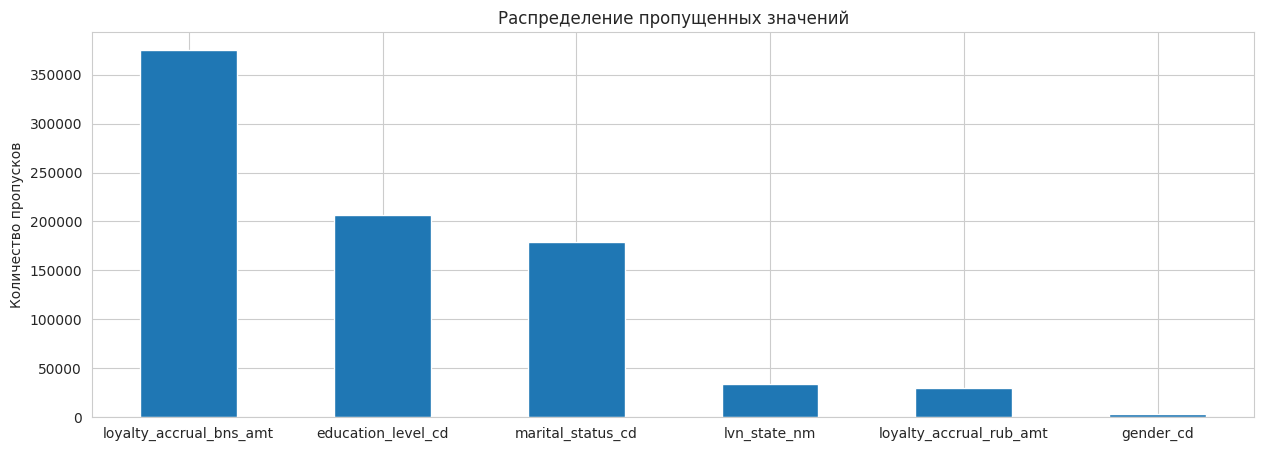

In [ ]:
plt.figure(figsize=(15, 5))
missing_data['Количество пропусков'].plot(kind='bar')
plt.title('Распределение пропущенных значений')
plt.ylabel('Количество пропусков')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Numerical features

df.describe()

,order_rk,party_rk,age,minute_cost,activation_cost,hold_amount,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
count,3.967490e+05,3.967490e+05,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,396749,396749,396749,396749.000000,396749,396749.000000,366992.000000,21948.000000
mean,2.892236e+08,5.988426e+08,31.544006,7.288688,42.593226,299.983869,3.681031,2024-08-18 19:57:21.649821952,2024-08-18 19:57:27.763654912,2024-08-18 20:08:54.222992128,3.536155,2024-08-18 20:29:37.922017280,127.647694,37.516121,127.789319
min,2.526112e+08,1.471700e+04,12.000000,1.500000,0.000000,80.000000,0.000000,2024-04-07 14:56:47,2024-04-07 14:57:01.030814,2024-04-07 15:00:26.432310,0.000000,2024-04-07 14:57:01.030814,0.000000,-161.940000,1.000000
25%,2.618150e+08,2.962323e+08,24.000000,6.490000,30.000000,300.000000,0.941054,2024-07-22 05:09:57,2024-07-22 05:10:01.884925952,2024-07-22 05:19:02.033711104,3.000000,2024-07-22 05:36:05.428699904,80.840000,11.240000,43.000000
50%,2.704367e+08,6.110092e+08,31.000000,7.490000,50.000000,300.000000,1.729883,2024-08-23 10:44:44,2024-08-23 10:44:48.782873088,2024-08-23 10:56:03.260775936,3.000000,2024-08-23 11:26:34.415717120,103.940000,18.730000,62.000000
75%,3.432678e+08,8.646921e+08,37.000000,8.220000,50.000000,300.000000,3.063694,2024-09-16 14:00:40,2024-09-16 14:00:44.200000,2024-09-16 14:13:01.654374912,3.000000,2024-09-16 14:33:59.144999936,142.100000,35.060000,81.000000
max,3.562528e+08,1.301075e+09,94.000000,19.990000,50.000000,500.000000,56012.640308,2024-10-21 17:18:04,2024-10-21 17:18:07.715000,2024-10-21 17:23:06.640943,12.000000,2024-10-21 21:13:43.199000,5627.640000,3185.000000,55429.360970
std,3.813458e+07,3.311675e+08,9.434545,1.289492,11.989974,1.939153,141.862349,NaN,NaN,NaN,1.209075,NaN,100.122365,75.208560,496.812143


In [ ]:
# Categorial features

df.describe(include='object')

,gender_cd,education_level_cd,marital_status_cd,lvn_state_nm,transport_model
count,393828,190059,217729,362572,396749
unique,2,5,5,212,14
top,M,GRD,UNM,Г МОСКВА,SL
freq,335458,94341,116094,90897,241247


In [ ]:
numeric_cols = df.select_dtypes('number')
category_cols = df.select_dtypes('object')

### Анализ числовых признаков

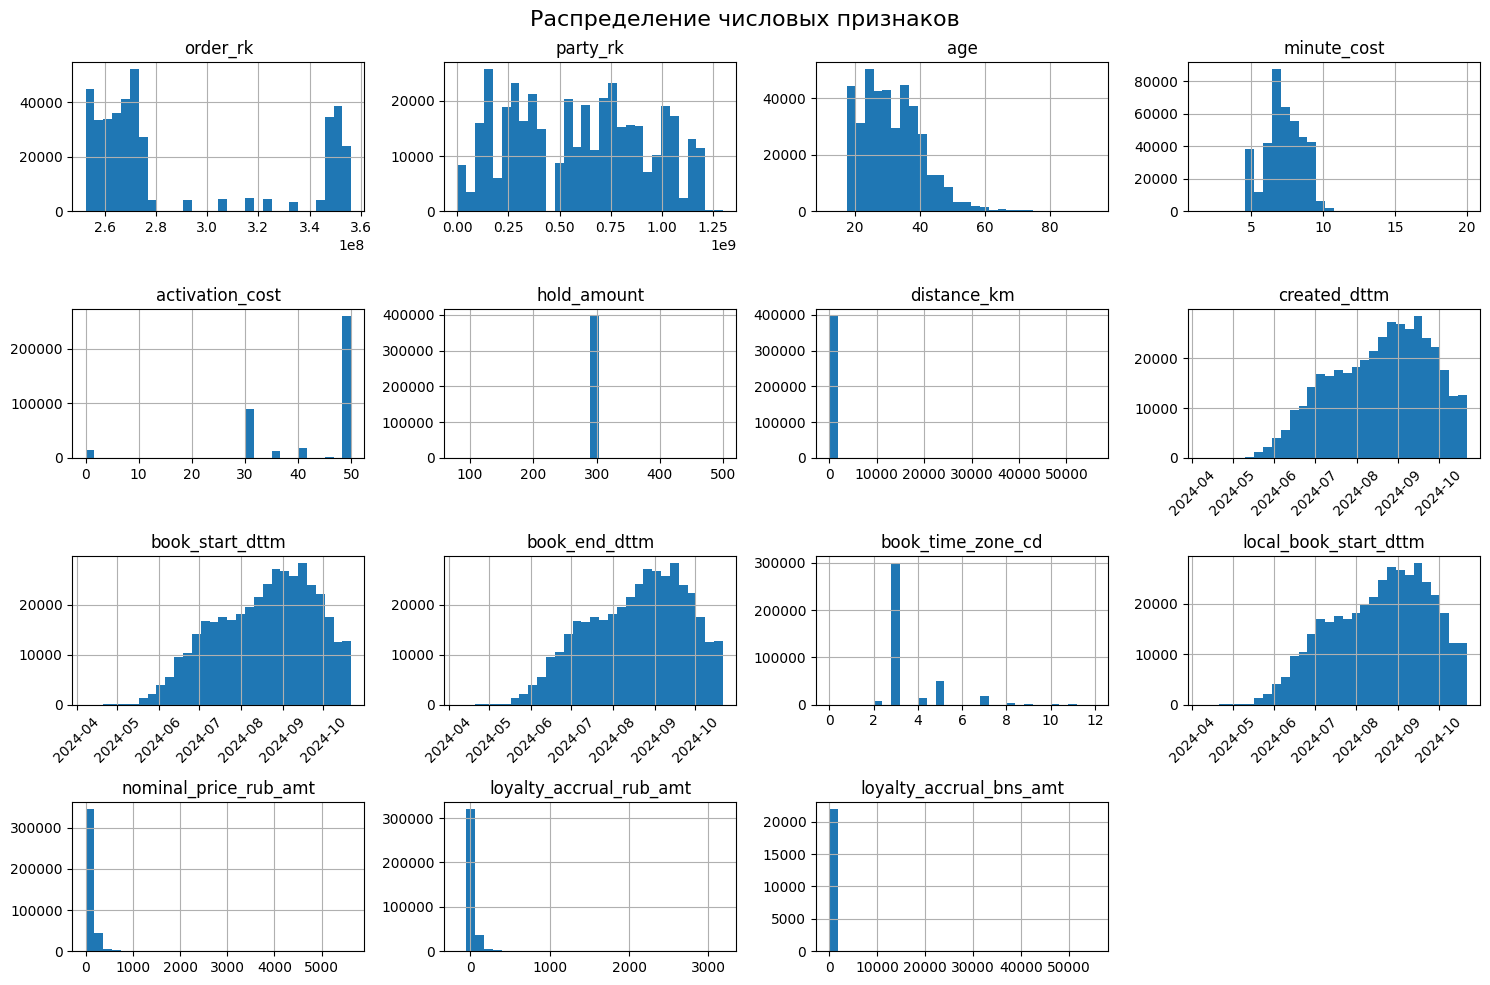

In [ ]:
# Распределение числовых признаков

axes = df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Распределение числовых признаков", fontsize=16)

axes[1, 3].tick_params(axis='x', rotation=45)
axes[2, 0].tick_params(axis='x', rotation=45)
axes[2, 1].tick_params(axis='x', rotation=45)
axes[2, 3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

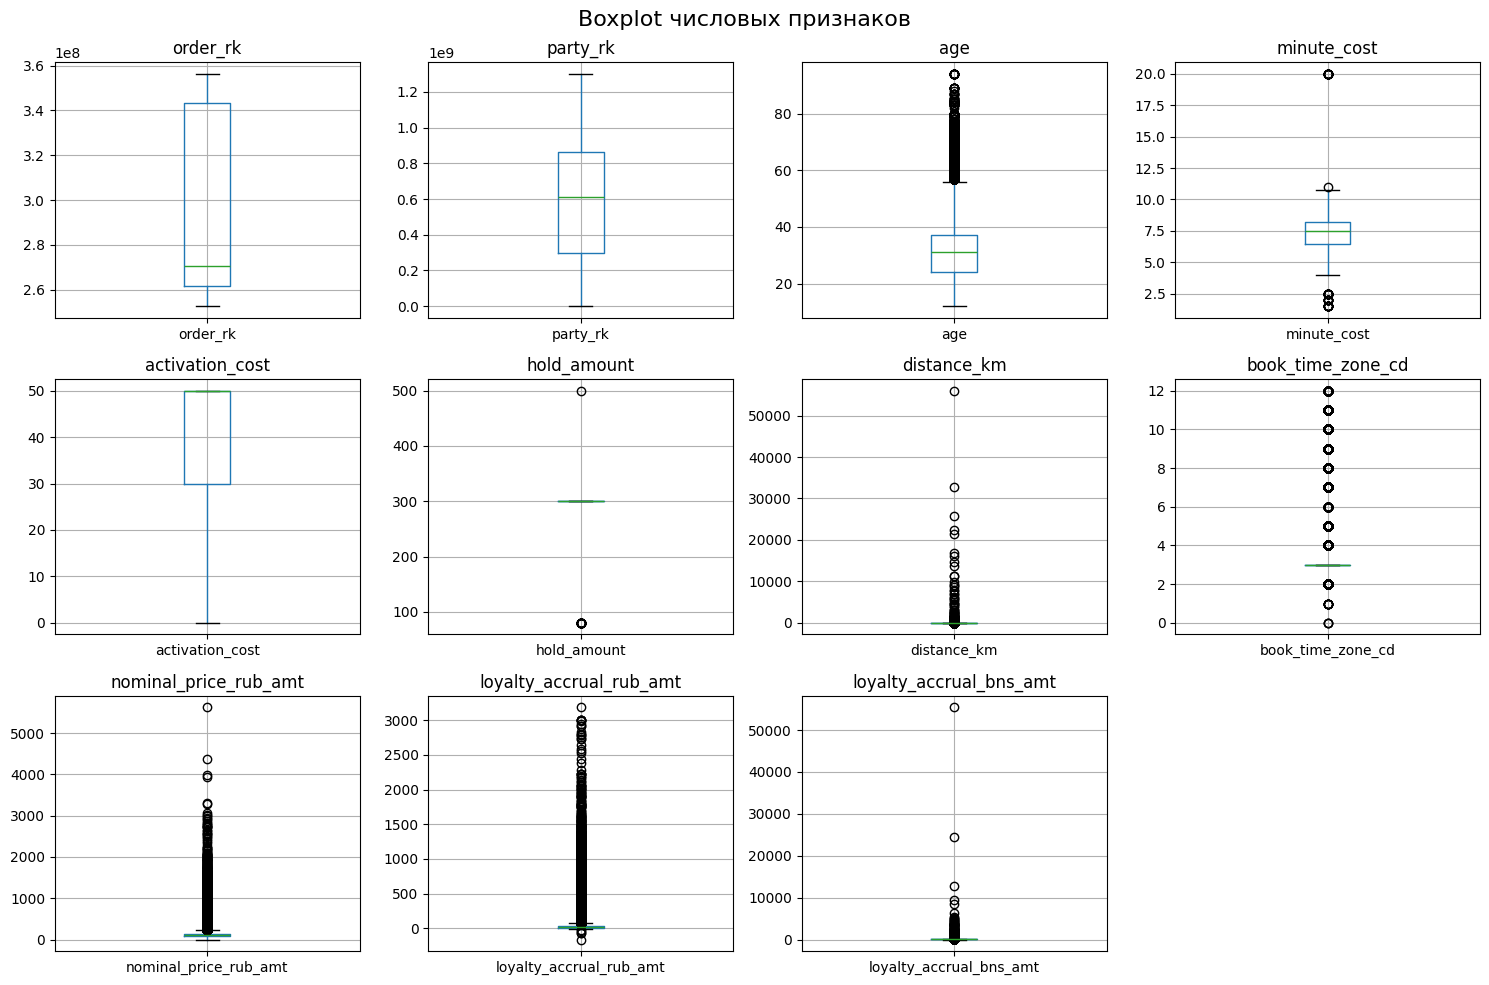

In [ ]:
# Boxplot числовых признаков

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle("Boxplot числовых признаков", fontsize=16)

for i, column in enumerate(numeric_cols):
    row = i // 4
    col = i % 4
    df.boxplot(column=column, ax=axes[row, col])
    axes[row, col].set_title(column)

if len(numeric_cols.columns) < 12:
    for j in range(len(numeric_cols.columns), 12):
        row = j // 4
        col = j % 4
        fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

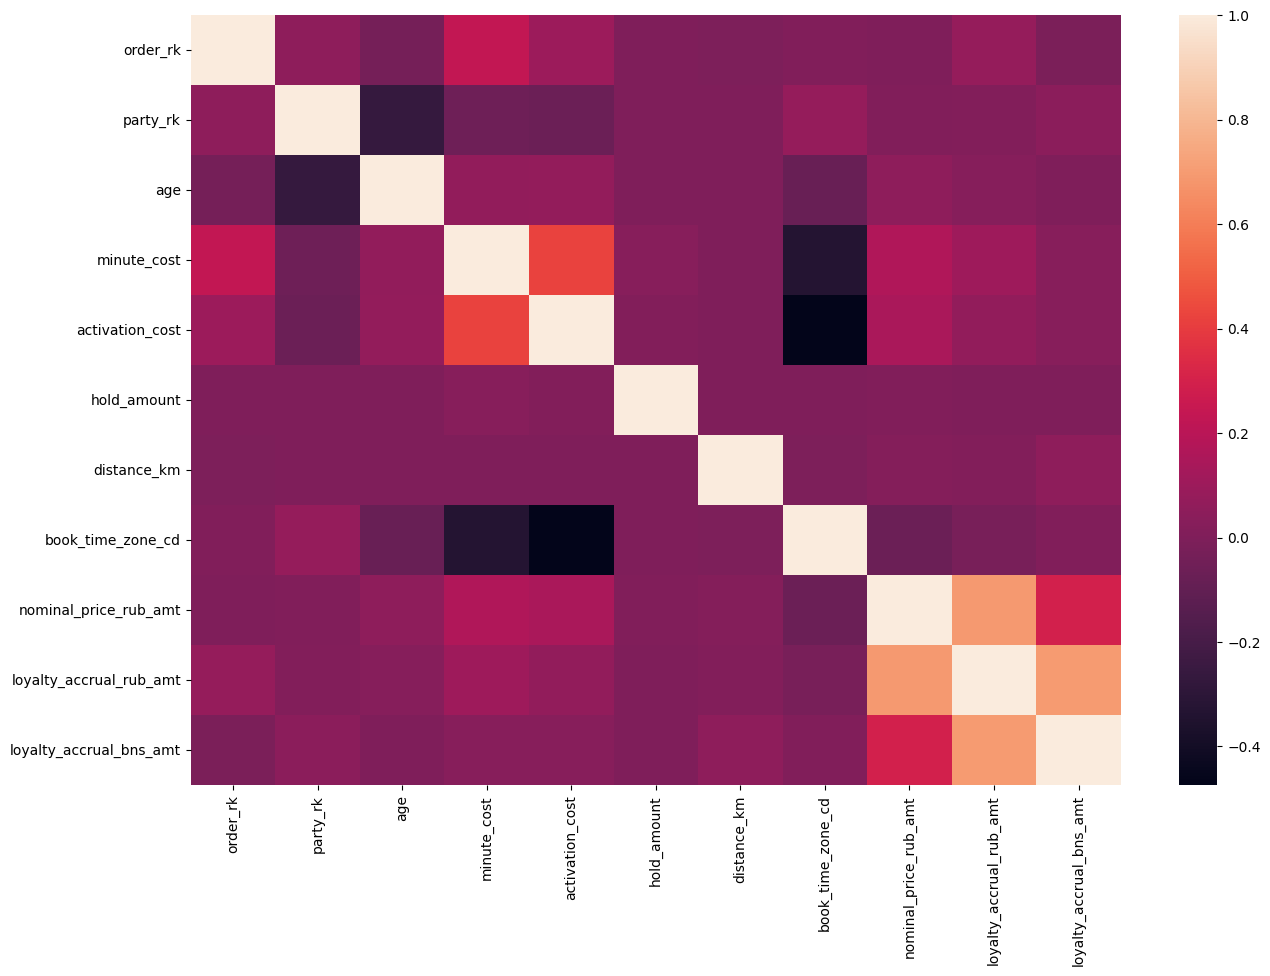

In [ ]:
# Тепловая карта корреляций

fig = plt.figure()
fig.set_size_inches(15, 10)

sns.heatmap(numeric_cols.corr())
plt.show()

### Анализ категориальных признаков

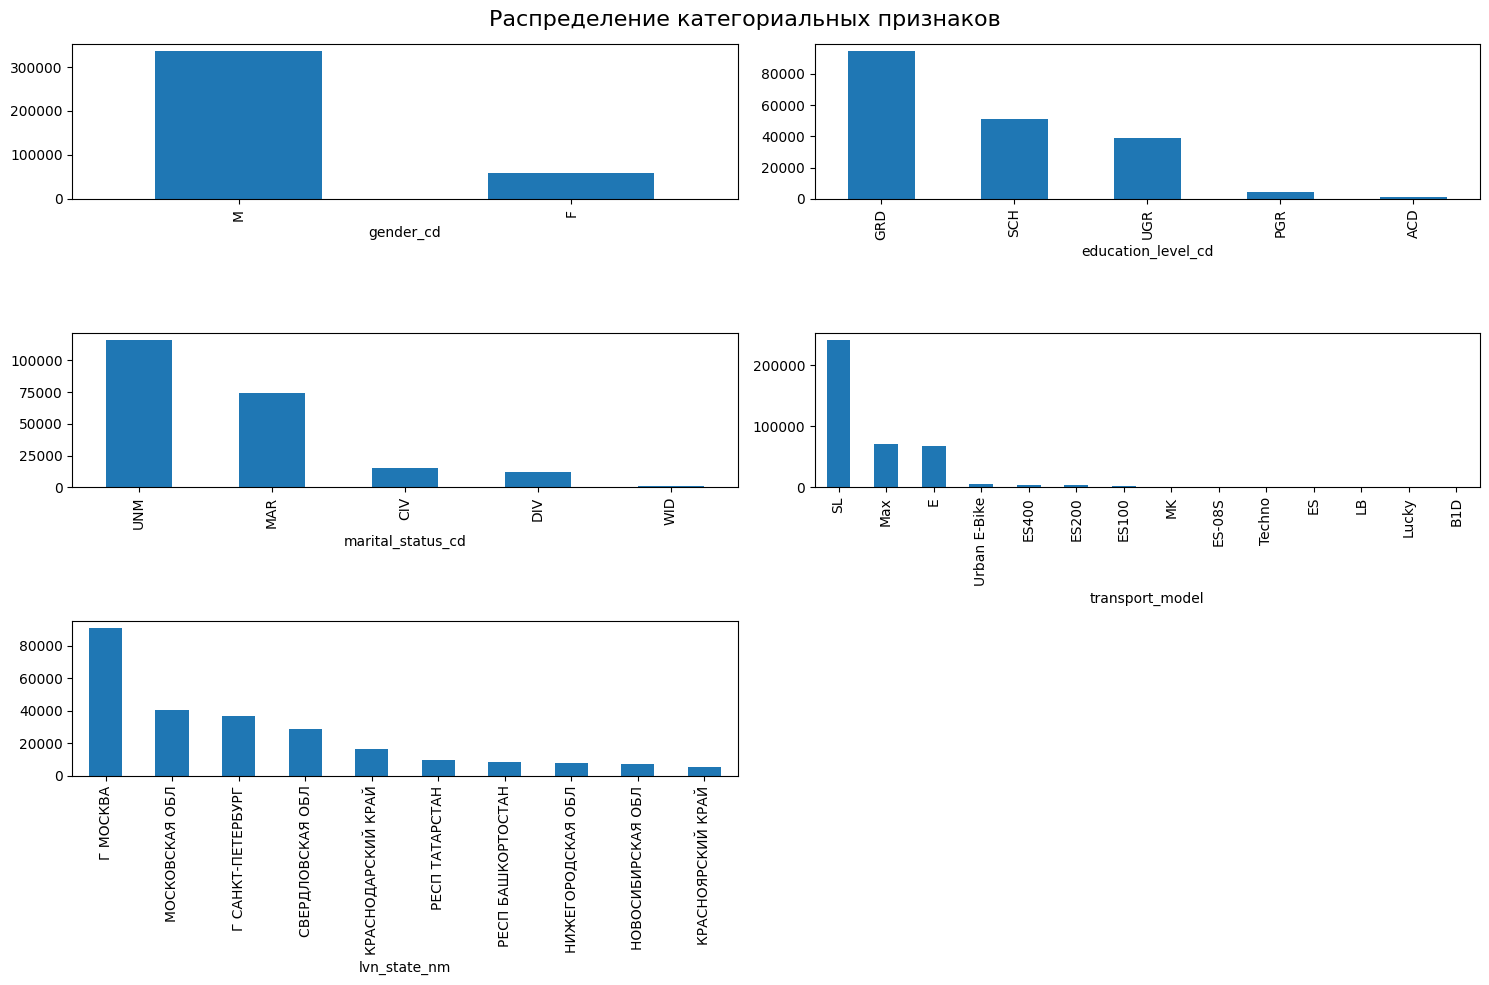

In [ ]:
# Распределение категориальных признаков

fig, ax = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle("Распределение категориальных признаков", fontsize=16)

df['gender_cd'].value_counts().plot(kind='bar', ax=ax[0, 0])
df['education_level_cd'].value_counts().plot(kind='bar', ax=ax[0, 1])
df['marital_status_cd'].value_counts().plot(kind='bar', ax=ax[1, 0])
df['transport_model'].value_counts().plot(kind='bar', ax=ax[1, 1])
df['lvn_state_nm'].value_counts().head(10).plot(kind='bar', ax=ax[2, 0])
fig.delaxes(ax[2, 1])

plt.tight_layout()
plt.show()

### Временной анализ

In [ ]:
df['hour'] = df['local_book_start_dttm'].dt.hour
df['day_of_week'] = df['local_book_start_dttm'].dt.day_name()
df['month'] = df['local_book_start_dttm'].dt.month_name()

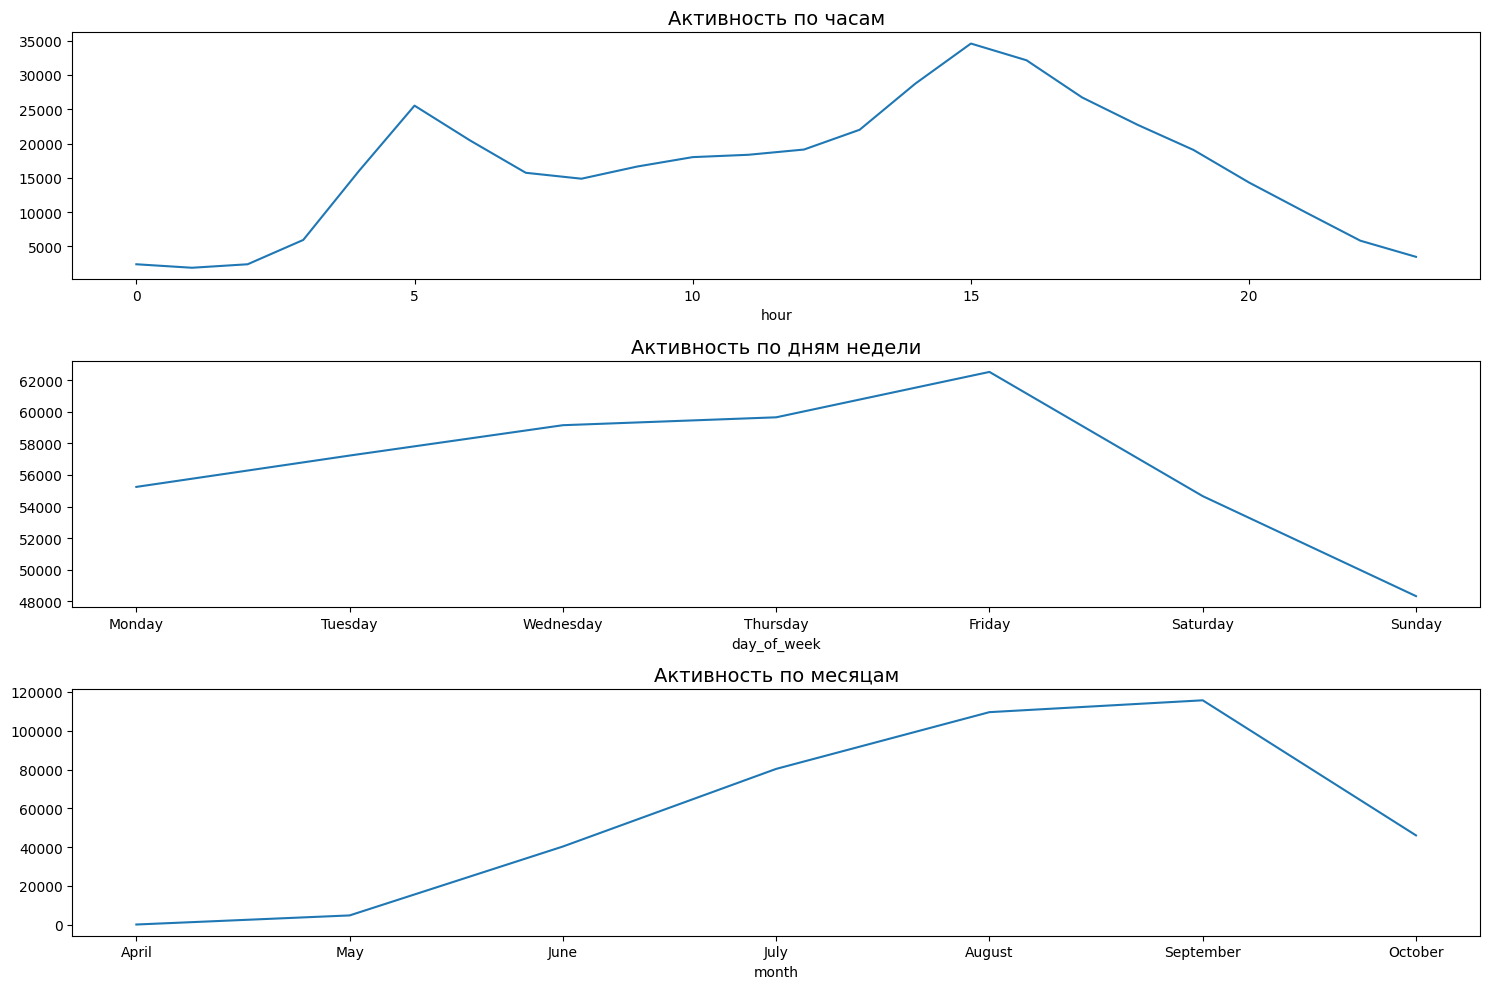

In [ ]:
# Распределение по времени

fig, axes = plt.subplots(3, 1, figsize=(15, 10))

hour_counts = df['hour'].value_counts().sort_index()
sns.lineplot(x=hour_counts.index, y=hour_counts.values, ax=axes[0])
axes[0].set_title('Активность по часам', fontsize=14)

day_order = list(calendar.day_name)
day_counts = df['day_of_week'].value_counts().reindex(day_order)
sns.lineplot(x=day_counts.index, y=day_counts.values, ax=axes[1])
axes[1].set_title('Активность по дням недели', fontsize=14)

month_order = list(calendar.month_name)[1:]
month_counts = df['month'].value_counts().reindex(month_order)
sns.lineplot(x=month_counts.index, y=month_counts.values, ax=axes[2])
axes[2].set_title('Активность по месяцам', fontsize=14)

plt.tight_layout()
plt.show()

### Анализ поездок

In [ ]:
df['book_time_min'] = (df['book_end_dttm'] - df['book_start_dttm']).dt.total_seconds() / 60

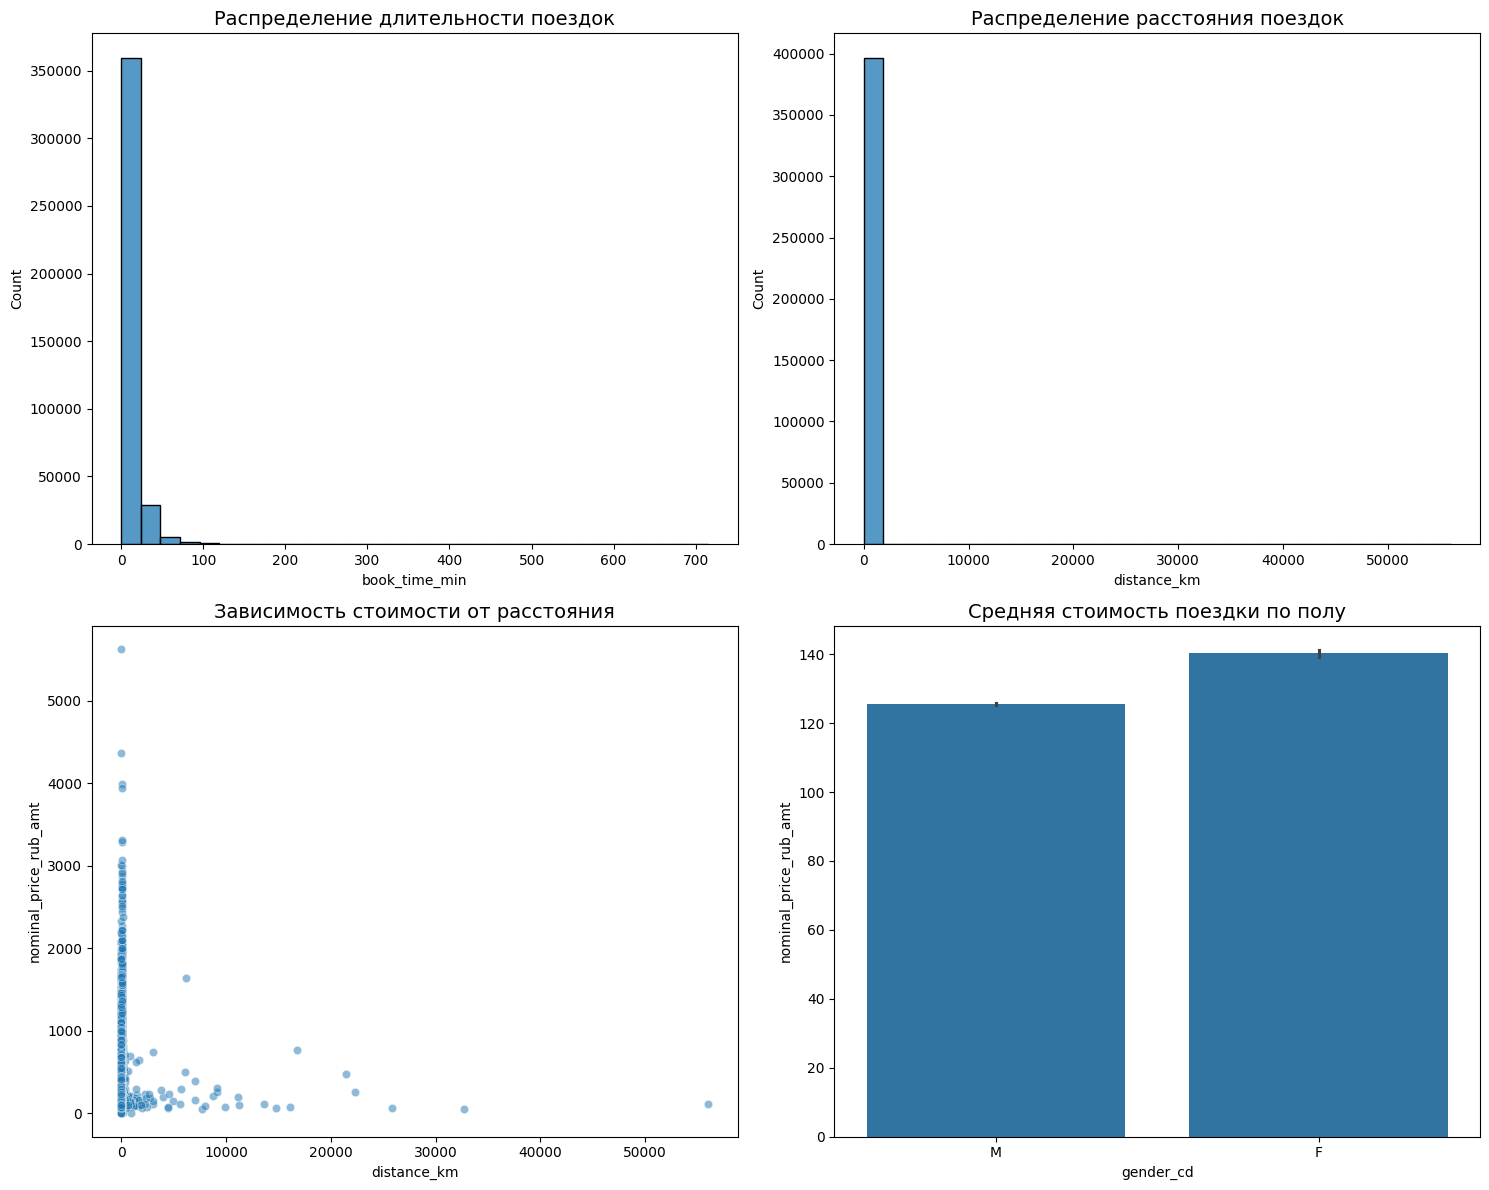

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Распределение длительности поездок
sns.histplot(df['book_time_min'], bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Распределение длительности поездок', fontsize=14)

# Распределение расстояния поездок
sns.histplot(df['distance_km'], bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Распределение расстояния поездок', fontsize=14)

# Зависимость стоимости от расстояния
sns.scatterplot(x='distance_km', y='nominal_price_rub_amt', data=df, ax=axes[1, 0], alpha=0.5)
axes[1, 0].set_title('Зависимость стоимости от расстояния', fontsize=14)

# Средняя стоимость поездки по группам
sns.barplot(x='gender_cd', y='nominal_price_rub_amt', data=df, ax=axes[1, 1], estimator='mean')
axes[1, 1].set_title('Средняя стоимость поездки по полу', fontsize=14)

plt.tight_layout()
plt.show()

### Сегментация пользователей

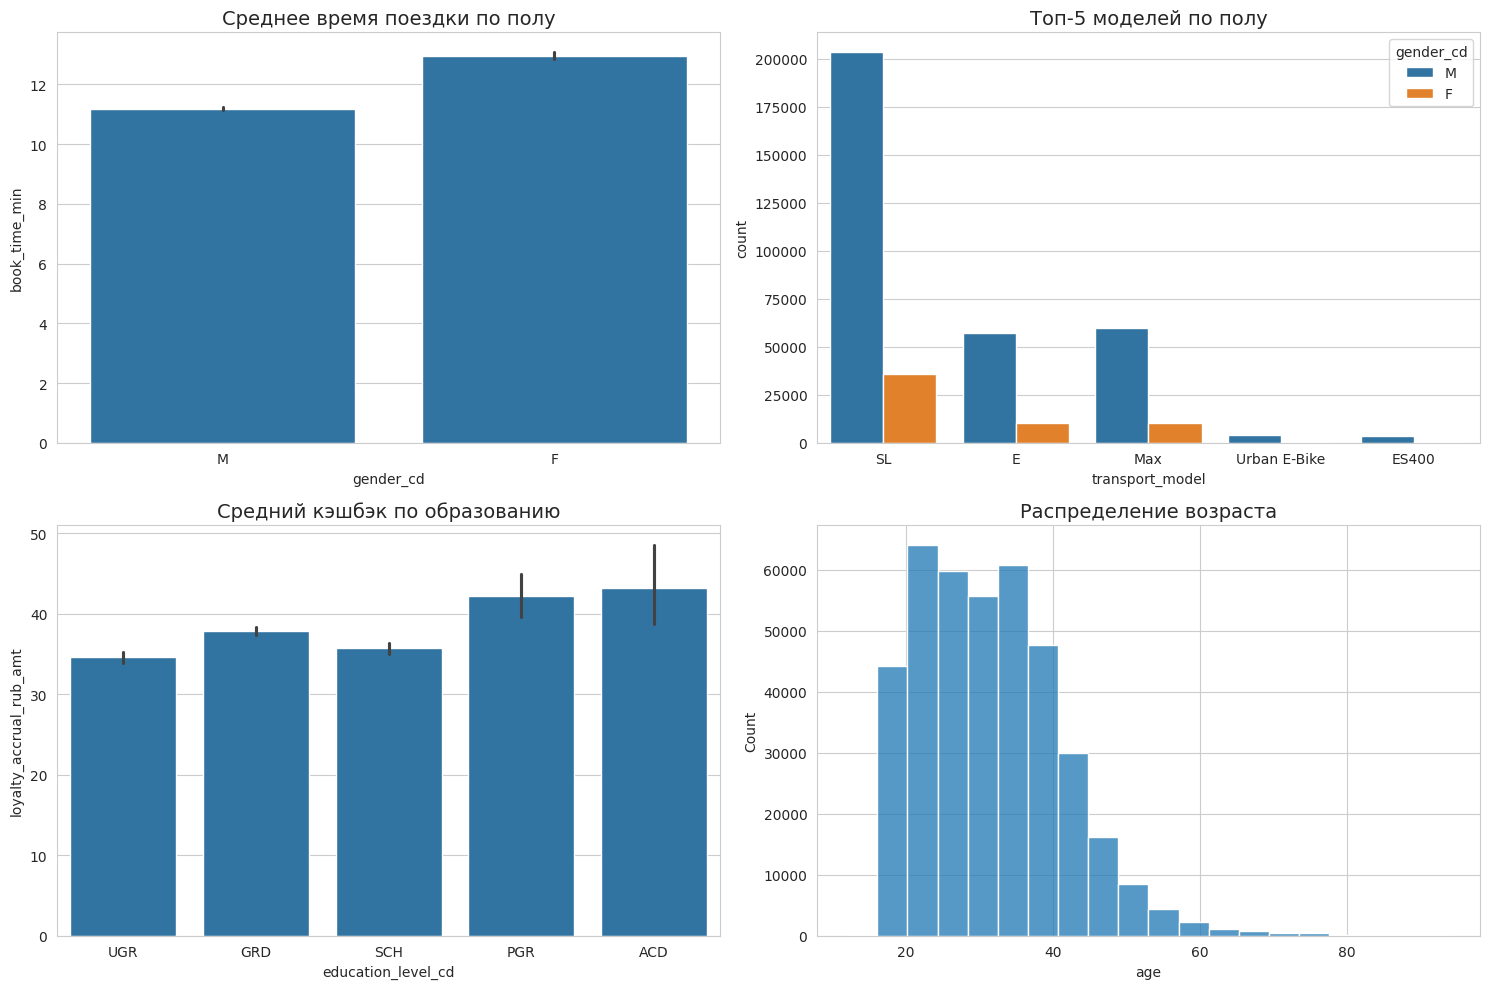

In [ ]:
plt.figure(figsize=(15, 10))

# Время поездки по полу
plt.subplot(2, 2, 1)
sns.barplot(x='gender_cd',  y='book_time_min', data=df, estimator='mean')
plt.title('Среднее время поездки по полу', fontsize=14)

# Популярность моделей (топ-5 для наглядности)
plt.subplot(2, 2, 2)
top_models = df['transport_model'].value_counts().head(5).index
df_filtered = df[df['transport_model'].isin(top_models)]
sns.countplot(x='transport_model', hue='gender_cd', data=df_filtered)
plt.title("Топ-5 моделей по полу", fontsize=14)

# Кэшбэк по образованию
plt.subplot(2, 2, 3)
sns.barplot(x='education_level_cd', y='loyalty_accrual_rub_amt',
            data=df, estimator='mean')
plt.title("Средний кэшбэк по образованию", fontsize=14)

# Распределение возраста
plt.subplot(2, 2, 4)
sns.histplot(x='age', data=df, bins=20)
plt.title("Распределение возраста", fontsize=14)

plt.tight_layout()
plt.show()